# **AP155 Lab Assignment**
## Module 5: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Bendejo, Kevin D.\
_Student No._:2022-08528\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: November 18, 2024 5:46PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Kevin D. Bendejo**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(30 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(20 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(30 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text.

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(20 pts.)*

In [1]:
import numpy as np
import numpy.linalg as lin
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
#constants
M = 9.109 * 10**(-31) # mass of the electron in kg
L = 10**(-8) # length of the box in m
hbar = 1.054571817*10**(-34) #joule seconds
N = 1000  # number of slices
a = L/N  #slice width spatial domain
h = 10**(-18) #time step (s)
#Initial Wave Function Constants
x_0 = L/2
sigma = 10**(-10) # width m
kappa = 5 * 10**(10) # wave number m^-1

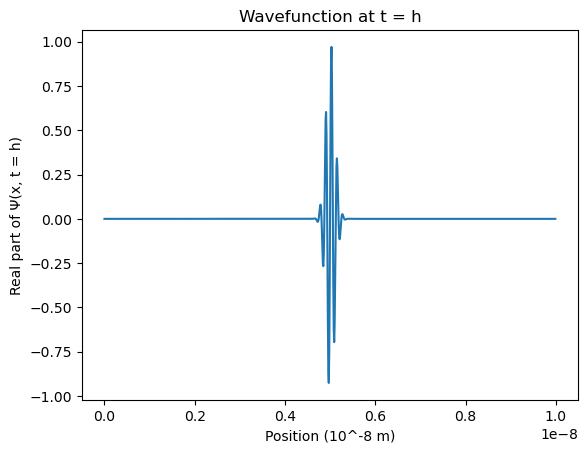

In [3]:
#Crank-Nicolson Method [Single Step]

#Solving for the initial wavefunction

#Function to solve psi
def psi_f(x):
  return (np.exp(-((x-x_0)**2)/(2*sigma**2)))*(np.exp(1j*kappa*x))

psi_0 = np.zeros(N, complex) #Initial psi to hold the calculated value for psi later

xpoints = np.arange(0.0,L,a) #Discretized position from 0 to L with steps a

#Calculating the wave function for each x at t = 0
for k in range (N):
  psi_0[k] = psi_f(xpoints[k])

#boundary conditions
psi_0[0] = 0.0 #psi = 0 at x = 0
psi_0[-1] = 0.0  #psi = 0 at x = L

#################################################################
#Solving for Vector v = B*psi

#Creating the B Matrix
B = np.zeros([N,N],complex)
b_1 = 1 - h*((1j*hbar)/(2*M*(a**2)))
b_2 = h*((1j*hbar)/(4*M*(a**2)))

#computing for the elements of the tridiagonal matrix B
for j in range (N-1):
  B[j,j] = b_1 #diagonal elements
  B[j+1,j] = b_2 #elements immediately below the diagonal
  B[j,j+1] = b_2 #elements immediately to the right of the diagonal

B[-1,-1] = b_1 #last element of B

v = np.dot(B, psi_0)

#################################################################
#Solving AΨ(x, t+h) = v

#Creating the matrix A
a_1 = 1 + h*((1j*hbar)/(2*M*(a**2)))
a_2 = -h*((1j*hbar)/(4*M*(a**2)))

#initializing A
A = np.zeros([N, N], complex)

#computing for the elements of the tridiagonal matrix A
for i in range (N-1):
  A[i,i] = a_1 #diagonal elements
  A[i,i+1] = a_2 #elements immediately to the right of the diagonal
  A[i+1,i] = a_2 #elements immediately below the diagonal

A[-1,-1] = a_1 #last element of A
##################################################################

# Solving for the psi(x, t + h) [single step]

psi_h = np.linalg.solve (A,v)
psi_h[0] = 0.0
psi_h[-1] = 0.0


plt.plot(xpoints, np.real(psi_h))
plt.title("Wavefunction at t = h")
plt.xlabel("Position (10^-8 m)")
plt.ylabel("Real part of Ψ(x, t = h)")
plt.show()

In [11]:
#Extending the code for Crank-Nicolson Method for Multiple steps

# Solving for the Ψ(x, t+h) [multiple step]

psi_timeevol = np.zeros((100,N)) #will hold the wavefunction for different times to be used in animation later
psi = psi_h # sets Ψ(x, h) as the initial wave function of the next steps
for t in range (100):
    psi_timeevol[t, :] = np.real(psi) #adds the psi to the list
    v = np.dot(B, psi) #Solving for Vector v = B*psi
    psi_new = np.linalg.solve (A,v) #Solving for the Ψ(x, t+h)
    psi = psi_new #assigns Ψ(x, t+h) as the Ψ(x, t) of the next iteration

    # Applying boundary conditions
    psi[0] = 0.0 #psi = 0 at x = 0
    psi[-1] = 0.0  #psi = 0 at x = L


In [13]:
#Animating the time evolution of the wavefunction

#setting up the initial graph
fig, ax = plt.subplots(figsize=(6, 4))
line, = ax.plot(xpoints, psi_timeevol[0], label="Real Part", color='blue') # Graphs the initial wavefunction vs position
plt.close() # removes the graph that will be made by the initial graph outside the animation

# Display features of the graph
ax.set_title("Wavefunction Evolution Over Time")
ax.set_xlabel("Position (10^(-8)m)")
ax.set_ylabel("Real Part of Wavefunction")
ax.set_xlim(0, L) #boundaries of the x-axis
ax.set_ylim(-1.2, 1.2) #boundaries of the y-axis

# Function to update the graph
def update(t):
    line.set_ydata(psi_timeevol[t]) #changes the data for the y to the corresponding wavefunction in the time evolution list
    return line,

# Create the animation using FuncAnimation
ani = FuncAnimation(fig, update, frames=100, interval=20, blit=True) # For an initial figure "fig", the function "update" is repeated equal to the number of frames
HTML(ani.to_jshtml()) #embeds the animation in the notebook
#number of iterations/frames is reduced to make the size of the file smaller

The graph of the real part of the wavefunction initially looks like a wave packet that is narrow but tall at $x_{0}$ = L/2. As it evolved with time, the wavepacket  gradually spread and became smaller but wider. This is due to the dispersion of the wavefunction. Dispersion occurs since the wave packet consists of multiple waves with different wavelengths with varying velocities. As a consequence, the wave packet spreads as it propagates to the wall.
The wave was reflected when it reached the boundaries at x = 0 and x = L. This is due to the imposed boundary conditions Ψ = 0 at the boundaries.  Since the wave packet spreads, some parts oithe are reflected firscompared toae others. This results in wave interference as the reflected wave and incident wave meet anproducete constructive and destructive interferences. esese interferensce produes a beviivor similar to wavepackets propagating away from the wall. However, wave packets are not really moving; only the interference pattern
Additionally, standing waves were also created for some time in the middle after a few reflections. This is also due to wave interference.
